In [1]:
from create_boundaries import *
from construct_mesh import *

In [2]:
filename_hr  = 'grid_hr_with_boundaries.nc'
filename_lr  = 'grid_lr_with_boundaries.nc'

grid_info_hr =  '/gpfsdswork/dataset/ClimSim_high-res/ClimSim_high-res_grid-info.nc'
grid_info_lr =  '/gpfsdswork/dataset/ClimSim_low-res/ClimSim_low-res_grid-info.nc'
nvertex = 10
verbose = False

In [44]:
# get the cartesian coordinates 
points = get_xyz(grid_info_lr)

# Delaunay triangulation

In [45]:
#compute the Delaunay triangulation of 'points' and D is the adjacency list for each point
simplicies, D = delaunay(points)
for k in D:
    D[k] = set(tuple(i) for i in D[k])

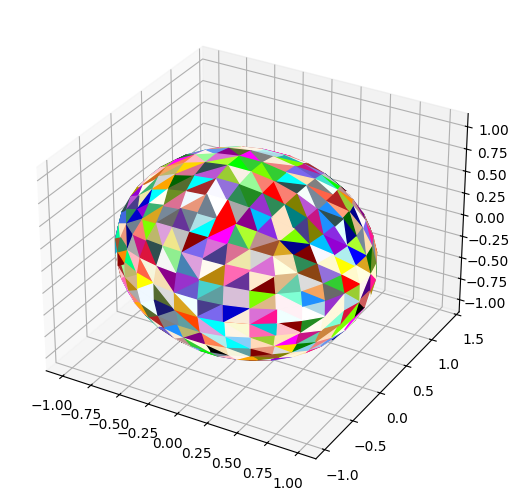

In [46]:
plot_triangulation(points, simplicies)

# Voronoi tesselation

In [47]:
# compute the dual mesh composed of polygone (Voronoi tesselation)
POLY, nvertex = polygones(simplicies, D, points, nvertex, verbose)

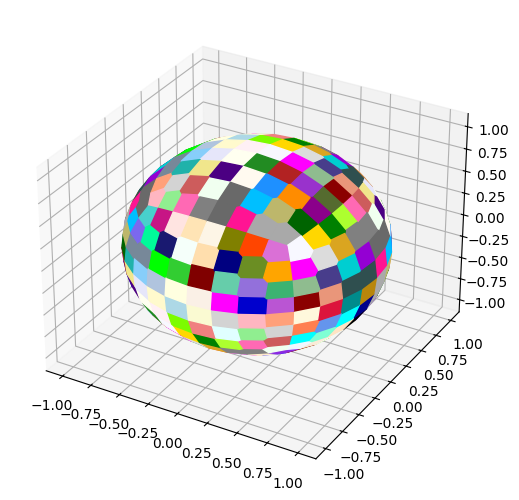

In [48]:
matplotlib_plot(POLY)

# create grid with boundaries

In [51]:
create_grid_info(filename_lr, grid_info_lr, verbose = False)
create_grid_info(filename_hr, grid_info_hr, verbose = False)

RuntimeError: NetCDF: Not a valid ID

# using psyplot to plot data

In [3]:
import psyplot.project as psy
import glob

In [4]:
data_path_lr = '/gpfsdswork/dataset/ClimSim_low-res/train/0001-05/'
nc_list = glob.glob(data_path_lr + 'E3SM-MMF.mli*')
nc_list = sorted(nc_list)
print(nc_list[0])

/gpfsdswork/dataset/ClimSim_low-res/train/0001-05/E3SM-MMF.mli.0001-05-01-00000.nc


In [5]:
data_path_hr = '/gpfsdswork/dataset/ClimSim_high-res/train/0001-05/'
nc_list_hr = glob.glob(data_path_hr + 'E3SM-MMF.mli*')
nc_list_hr = sorted(nc_list_hr)
print(nc_list_hr[72])

/gpfsdswork/dataset/ClimSim_high-res/train/0001-05/E3SM-MMF.mli.0001-05-02-00000.nc


In [37]:
#ds = xr.open_dataset(filename_lr)
#for poly in ds['bounds_lon']:
#    for lon in poly:
#        if lon.values>100 or lon.values< -100:
#            print(lon.values)
#    print('\n')

psyplot.project.Project([    arr5: 1-dim DataArray of area, with (ncol)=(384,), ])

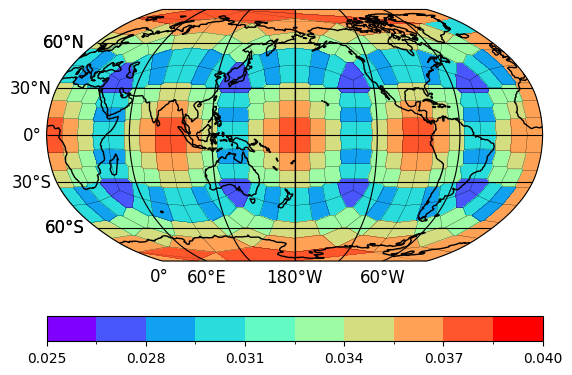

In [35]:
psy.plot.mapplot(filename_lr, name='area', cmap = 'rainbow', datagrid={'c': 'k', 'lw': 0.1}, projection='robin')

In [6]:
In, Out = load_ncfiles(nc_list_hr[72:75], filename_hr)

time counter =  3
input files loaded !
output files loaded !


In [7]:
In

<xarray.Dataset> Size: 324MB
Dimensions:           (ncol: 21600, lev: 60, ilev: 61, nvertex: 10,
                       time_counter: 3)
Coordinates:
    lat               (ncol) float64 173kB ...
    lon               (ncol) float64 173kB ...
  * lev               (lev) float64 480B 0.0 1.0 2.0 3.0 ... 56.0 57.0 58.0 59.0
  * ilev              (ilev) float64 488B 0.0 1.0 2.0 3.0 ... 58.0 59.0 60.0
    bounds_lat        (ncol, nvertex) float64 2MB ...
    bounds_lon        (ncol, nvertex) float64 2MB ...
  * time_counter      (time_counter) int64 24B 0 1 2
Dimensions without coordinates: ncol, nvertex
Data variables: (12/30)
    area              (ncol) float64 173kB ...
    ymd               (time_counter) int32 12B 10502 10502 10502
    tod               (time_counter) int32 12B 0 1200 2400
    cam_in_ALDIF      (time_counter, ncol) float64 518kB 1.0 1.0 ... 0.08764
    cam_in_ALDIR      (time_counter, ncol) float64 518kB 1.0 1.0 ... 0.04881
    cam_in_ASDIF      (time_counter, ncol) float64 518kB 1.0 1.0 ... 0.05674
    ...                ...
    state_t           (time_counter, lev, ncol) float64 31MB 221.7 ... 291.2
    state_u           (time_counter, lev, ncol) float64 31MB 81.19 ... 5.574
    state_v           (time_counter, lev, ncol) float64 31MB 11.72 ... 3.954
    pbuf_CH4          (time_counter, lev, ncol) float64 31MB 1.689e-07 ... 9....
    pbuf_N2O          (time_counter, lev, ncol) float64 31MB 2.615e-08 ... 4....
    pbuf_ozone        (time_counter, lev, ncol) float64 31MB 3.129e-07 ... 7....
Attributes:
    description:  test_climsim

In [24]:
var = 'state_q0001'
time_counter = 2
lev = 20

psyplot.project.Project([    arr8: 1-dim DataArray of state_q0001, with (ncol)=(21600,), lev=20.0, time_counter=2])

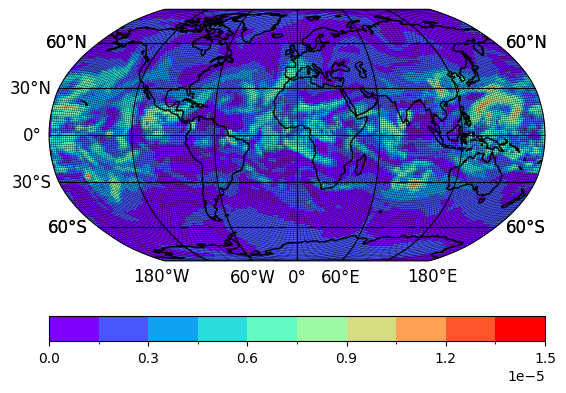

In [25]:
In.psy.plot.mapplot(name=var, time_counter = time_counter, lev = lev, cmap = 'rainbow', datagrid={'c': 'k', 'lw': 0.1}, projection='robin')